多尺度卷积注意力图像篡改定位网络

Multiscale Convolutional Attention Image Tampering Location Network

演示文件 // demo file

载入模型

In [20]:
import torch
from models.IMLMCA import imlmca

device = torch.device("cpu") # your device : cpu / cuda:x

# get model
model = imlmca()

# load  weight
checkpotin_path = r"imlmca.pth" # file path to model weight
checkpoint = torch.load(checkpotin_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])

model.to(device)
model.eval()

MSCA_Head(
  (backbone): MSCAN(
    (patch_embed1): StemConv(
      (proj): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): GELU()
        (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (block1): ModuleList(
      (0): Block(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (attn): SpatialAttention(
          (proj_1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (activation): GELU()
          (spatial_gating_unit): AttentionModule(
            (conv0): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=64)
            (conv0_1): Conv2d(64, 64, kernel_size=(1, 7), stride=(1, 1), padding=(0, 3), groups=64)
           

图片处理

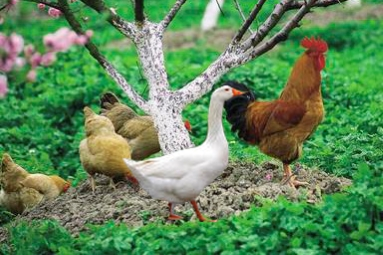

In [21]:
import numpy as np
from PIL import Image
from torchvision import transforms as T

transform = T.Compose([
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

img_path = r"test.jpg"
image = Image.open(img_path)
display(image)
# %matplotlib inline
image = np.array(image)
# image = np.float32(image) / 255
image = transform(image).unsqueeze(0).to(device)

模型预测

In [22]:
output = model(image)
b, c, h, w = output.shape
normalized_output = torch.sigmoid(output).cpu()
output = 255 * ((normalized_output > 0.5) + 0).reshape(h,w).detach().cpu().numpy().astype(np.uint8) # threadhold 0.5

output =  Image.fromarray(output)
output.save(r"pred.png")

预测结果显示

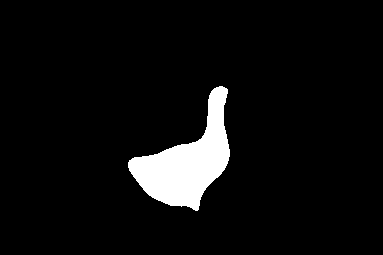

In [25]:

pred = Image.open('pred.png')
display(pred)